# Explore here

In [10]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()


In [2]:
# making connection with the API
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id= client_id, client_secret= client_secret)

# making API requests

artisturl = '4gzpq5DPGxSnKTe4SA8HAU'
sp = spotipy.Spotify(auth_manager=auth_manager)
results = sp.artist_top_tracks(artisturl)

In [3]:
# extract name, popularity and duration in seconds

tracks = []
popularity = []
duration = []
for track in results['tracks'][:10]:
    tracks.append(track['name'])
    popularity.append(track['popularity'])
    duration.append(round(track['duration_ms']/1000/60, 2))

In [4]:
# transform request into DataFrame
songs = {"Track": tracks, "Popularity": popularity, "Duration": duration}
songs_df = pd.DataFrame(songs)

In [9]:
#Top 3 songs

songs_top_3 = songs_df[:3]
songs_top_3

,Track,Popularity,Duration
0,Yellow,92,4.45
1,Viva La Vida,88,4.04
2,Something Just Like This,88,4.12


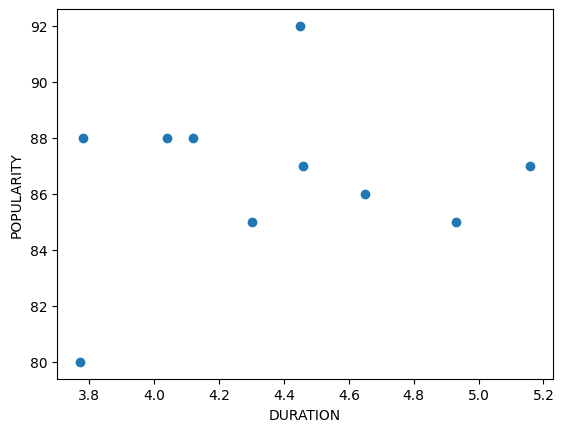

In [23]:
# Analyzing statistical relationship with a plot

x = songs_df['Duration']
y = songs_df['Popularity']

plt.scatter(x, y)
plt.xlabel("DURATION")
plt.ylabel("POPULARITY")
plt.show()

Upon observing this plot, we can see that duration does not have a relationship with popularity. For instance, there are two songs with almost identical durations but different levels of popularity. Additionally, there is a song that lasts longer but has the same level of popularity as one of the shorter songs.